In [30]:
import os
from glob import glob
import torch
from monai.transforms import Compose,LoadImaged,ToTensord,EnsureChannelFirstd,Spacingd,ScaleIntensityRanged,
CropForegroundd,Resized
from monai.data import Dataset,DataLoader
from monai.utils import first
import matplotlib.pyplot as plt

# Function to return the Training and Validation Dataloaders after transforming them

In [40]:
def prepare(data_dir,pixdim=(1.5,1.5,1),spatial_size=[128,128,65],a_min=-200,a_max=200):
    
    # CREATING DICTIONARY OF {IMAGE:LABEL} FOR BOTH TRAINING AND VALIDATION
    
    train_images = sorted(glob(os.path.join(data_dir,'train_images','*.nii.gz')))
    train_labels = sorted(glob(os.path.join(data_dir,'train_labels','*.nii.gz')))

    val_images = sorted(glob(os.path.join(data_dir,'val_images','*.nii.gz')))
    val_labels = sorted(glob(os.path.join(data_dir,'val_labels','*.nii.gz')))

    train_dict = [{"image":image_name,"label":label_name} for image_name,label_name in zip(train_images,train_labels)]
    val_dict = [{"image":image_name,"label":label_name} for image_name,label_name in zip(val_images,val_labels)]
    
    # APPLYING FILTERS ON BOTH TRAINING AND VALIDATION
    
    og_transforms = Compose([
        LoadImaged(keys=['image','label']),
        EnsureChannelFirstd(keys=['image','label'], channel_dim="no_channel"),
        ToTensord(keys=['image','label'])
    ])


    train_transforms = Compose([
        LoadImaged(keys=['image','label']),
        EnsureChannelFirstd(keys=['image','label'], channel_dim="no_channel"),
        Spacingd(keys=['image','label'],pixdim=pixdim),
        ScaleIntensityRanged(keys=['image'],a_min=a_min,a_max=a_max,b_min=0.0,b_max=1.0,clip=True),
        CropForegroundd(keys=['image','label'],source_key='image',allow_smaller = True),
        Resized(keys=['image','label'],spatial_size=spatial_size),
        ToTensord(keys=['image','label'])
    ])

    val_transforms = Compose([
        LoadImaged(keys=['image','label']),
        EnsureChannelFirstd(keys=['image','label'], channel_dim="no_channel"),
        Spacingd(keys=['image','label'],pixdim=pixdim),
        ScaleIntensityRanged(keys=['image'],a_min=a_min,a_max=a_max,b_min=0.0,b_max=1.0,clip=True),
        CropForegroundd(keys=['image','label'],source_key='image',allow_smaller = True),
        Resized(keys=['image','label'],spatial_size=spatial_size),
        ToTensord(keys=['image','label'])
    ])
    
    # DATASETS AND DATALOADERS
    


    train_dataset = Dataset(data=train_dict,transform=train_transforms)
    train_loader = DataLoader(train_dataset,batch_size=1)

    
    val_dataset = Dataset(data=val_dict,transform=val_transforms)
    val_loader = DataLoader(val_dataset,batch_size=1)
    
    og_dataset = Dataset(data=train_dict,transform=og_transforms)
    og_loader = DataLoader(og_dataset,batch_size=1)
    
    
    return og_loader,train_loader,val_loader
    
    
    

# Function to show an image

In [41]:
def show_image(og_loader,train_loader,slice_no=0):
    test = first(train_loader)
    test_og = first(og_loader)
    plt.figure('Testing',(10,10))
    
    plt.subplot(1,3,1)
    plt.title("Original Image of CT Scan")
    plt.imshow(test_og['image'][0,0,:,:,slice_no],cmap="gray")
    
    plt.subplot(1,3,2)
    plt.title("Modified Image of CT Scan")
    plt.imshow(test['image'][0,0,:,:,slice_no],cmap="gray")
    
    plt.subplot(1,3,3)
    plt.title("Modified Label of CT Scan")
    plt.imshow(test['label'][0,0,:,:,slice_no])
    

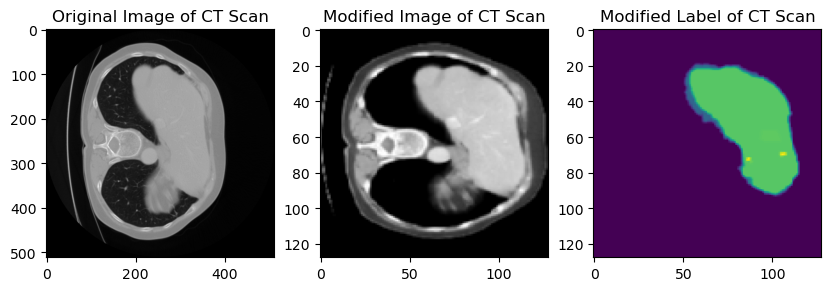

In [42]:
data_dir = '/Users/ansafhassan/Documents/Semester V/Image Processing/Group Project/Liver Segmentation/NIFTI Files'
og_loader,train_loader,test_loader = prepare(data_dir)
show_image(og_loader,train_loader,62)




NameError: name 'torch' is not defined